In [214]:
import pandas as pd
import numpy as np
import random as rnd


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



In [215]:
train_df = pd.read_csv('train.csv')
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [216]:
# computing number of rows 
train_rows = len(train_df.axes[0]) 
  
# computing number of columns 
train_cols = len(train_df.axes[1]) 
  
print("Number of Training Rows: ", train_rows) 
print("Number of training Columns: ", train_cols) 

Number of Training Rows:  891
Number of training Columns:  12


In [1]:
test_df = pd.read_csv('test.csv')
test_df.head()
test_df.shape

NameError: name 'pd' is not defined

In [218]:
# computing number of rows 
test_rows = len(test_df.axes[0]) 
  
# computing number of columns 
test_cols = len(test_df.axes[1]) 
  
print("Number of Testing Rows: ", test_rows) 
print("Number of Testing Columns: ", test_cols)

Number of Testing Rows:  418
Number of Testing Columns:  11


In [219]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [220]:
combine = [train_df, test_df]

In [221]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [222]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We are now creating new columns from the exisiting columns to find correlations

In [223]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


We can see that the survival rate of Pclass=1 is higher compared to Pclass=2 and Pclass=3

In [224]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,Sex,Survived
1,male,0.188908
0,female,0.742038


We can that the survival rate of female is higher compared male

In [225]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


As we can the survival rate is higher for SibSp=1 and nil for SibSp=8

In [226]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [227]:
combine = [train_df, test_df]

In [228]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [229]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [230]:
train_df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

# Cleaning the data

We don't require some of the columns for this analysis

In [231]:
train_df = train_df.drop(columns = ['Ticket' , 'Cabin'], axis=1)
test_df = test_df.drop(columns = ['Ticket' , 'Cabin'], axis=1)

In [232]:
combine = [train_df, test_df]

We have reduced the number of columns and making our analysis easier.

We can see that we have reduced the columns of training and testing to 10, 9 respectively

In [233]:
print('train',len(train_df.axes[1]))
print('test', len(test_df.axes[1]))

train 10
test 9


In [234]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

As we can see, only 342 of the 891 people who aboard the ship survived.

Checking the survival rate for age range wrt Pclass

C:\Users\dell\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\dell\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


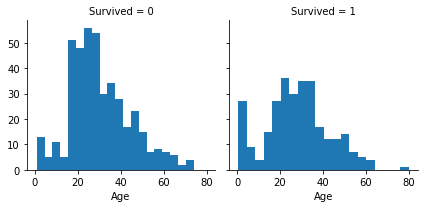

In [235]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\dell\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\dell\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


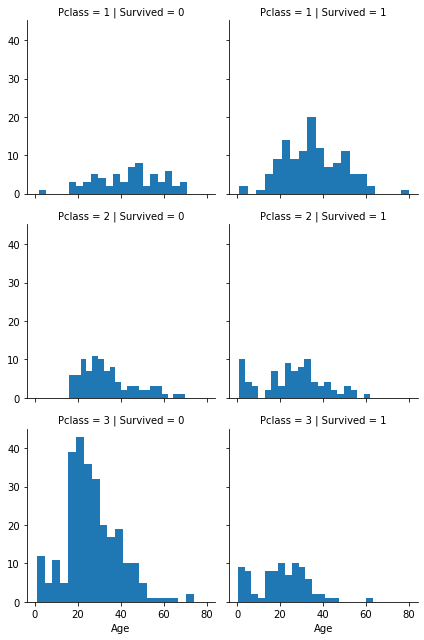

In [236]:

g = sns.FacetGrid(train_df, row = 'Pclass', col='Survived')
g.map(plt.hist, 'Age',  bins=20)

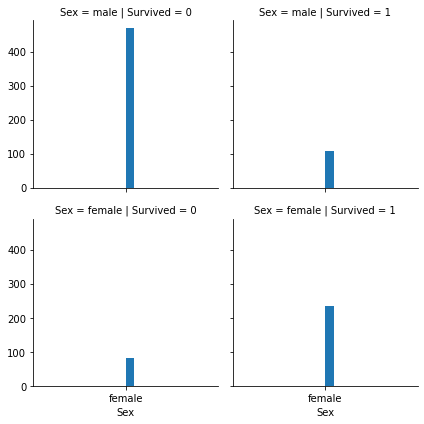

In [237]:
g = sns.FacetGrid(train_df, col='Survived', row='Sex')
g.map(plt.hist, 'Sex', bins=20)

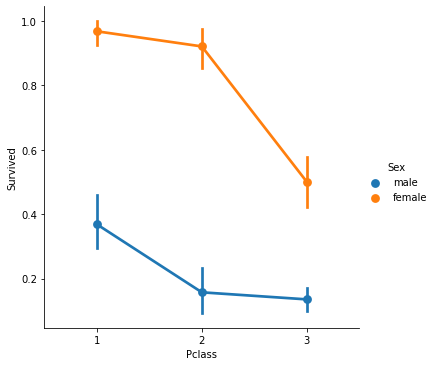

In [238]:

g = sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="point", data=train_df)


C:\Users\dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


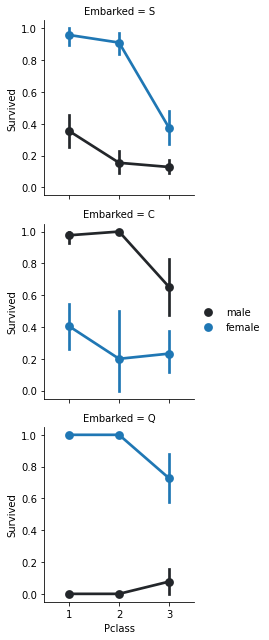

In [239]:
grid = sns.FacetGrid(train_df, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


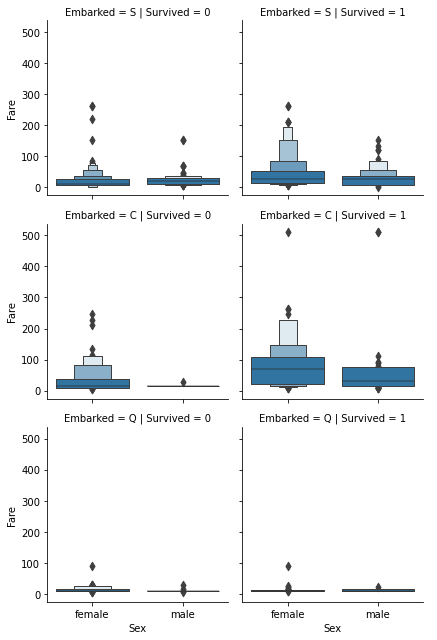

In [240]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived')
grid.map(sns.boxenplot, 'Sex', 'Fare')
grid.add_legend()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

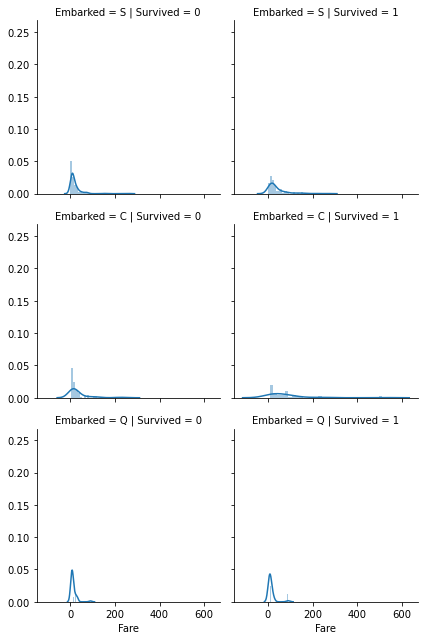

In [241]:
g = sns.FacetGrid(train_df, row="Embarked", col="Survived")
g.map(sns.distplot, 'Fare', bins=30)
plt.show()

As we can see the survival rate is high when the passesngers have bought fares.
Passengers that have embarked from Queenstown have a better survival rate than the other two.


In [242]:
train_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [243]:
pd.crosstab(train_df.Pclass, train_df.Survived, margins=True).style.background_gradient(cmap='PuBu')

#margins=True creats a new collumn of summation('All') of all the values in a row.

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [244]:
pd.crosstab([train_df.Sex, train_df.Survived], train_df.Pclass, margins=True).style.background_gradient(cmap ='PuBuGn')

In [245]:
pd.crosstab([train_df.Sex, train_df.Survived], train_df.Embarked, margins=True).style.background_gradient(cmap ='PuBuGn')

Women who embarked their journey from Southampton had a better survival rate than the other cities.
Even though more men who embarked from Southampton survived the number of men who died is higher.

We will find the number of NULL values from all the columns to fill them so that we can get a better result than just dropping them from the dataset.

In [246]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Creating a new column to improvise the 'Name' column

In [247]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    #The above line of code extract the Titles from the 'Name' column so that we can modify to simple titles.
    
pd.crosstab(train_df['Title'], train_df['Sex']) #Mentions the r/p between the 'Title' and 'Sex'
    
    


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can now edit the above title to recent terms and combine the terms not used in today's world to 'Uncommon'

In [248]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Uncommon')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')


Displaying the edited version of title wrt to Survival Rate

In [249]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Uncommon,0.347826


In [250]:
print('Max Age',train_df.Age.max())
print('Min Age',train_df.Age.min())
print('Mean Age',train_df.Age.mean())

Max Age 80.0
Min Age 0.42
Mean Age 29.69911764705882


We know that the number of NULL values for the 'Age' column is 177.
We will fill this up using mean values wrt the 'Title'

In [251]:
train_df.groupby('Title')['Age'].mean()

Title
Master       4.574167
Miss        21.845638
Mr          32.368090
Mrs         35.788991
Uncommon    45.545455
Name: Age, dtype: float64

In [252]:
train_df.groupby('Title')['Age'].median()

Title
Master       3.5
Miss        21.0
Mr          30.0
Mrs         35.0
Uncommon    48.5
Name: Age, dtype: float64

We will go with the mean values for replacing the NaN values as it provides more accuracy when predicting.

lista = train_df['Age']

lista

lista[888] is not None

r,c = train_df.shape
mr_null=0
for i in range(0,r):
    if train_df['Title'][i] == 'Mr' and lista[i] is not None:
        mr_null += 1

mr_null

train_df['Age'].isnull()

In [253]:
train_df.groupby('Title')['Age'].mean()

Title
Master       4.574167
Miss        21.845638
Mr          32.368090
Mrs         35.788991
Uncommon    45.545455
Name: Age, dtype: float64

Filling up the NaN values

In [254]:
train_df.loc[(train_df.Age.isnull()) & (train_df.Title=='Master'), 'Age'] = 5
train_df.loc[(train_df.Age.isnull()) & (train_df.Title=='Miss'), 'Age'] = 22
train_df.loc[(train_df.Age.isnull()) & (train_df.Title=='Mr'), 'Age'] = 33
train_df.loc[(train_df.Age.isnull()) & (train_df.Title=='Mrs'), 'Age'] = 36
train_df.loc[(train_df.Age.isnull()) & (train_df.Title=='Uncommon'), 'Age'] = 46

In [255]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Title          0
dtype: int64

Hence all the NaN values in the column have been filled for improving the training accuracy.

In [256]:
pd.crosstab([train_df.Embarked, train_df.Pclass],
            [train_df.Sex, train_df.Survived], margins=True).style.background_gradient(cmap ='YlOrBr')

As we can see, the number of people who have survived when they embarked their journey from Southampton is higher than any other city.

Also more people embarked from Southampton.


We can now fill up the 2 NaN values in the 'Embarked' column with S as majority of the people on the ship were from Southampton.

In [257]:
train_df.Embarked.fillna('S', inplace=True)

In [258]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

Since we have converted the Name in a numerical format ie 'Title' we do not require 'Name' column.

We also do not need PassengerID for the training set.

In [259]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)


In [260]:
combine = [train_df, test_df]

In [261]:
train_df.shape, test_df.shape

((891, 9), (418, 9))

Converting the 'Age' from string values to numerical format

Female = 1

Male = 0

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

In [262]:
train_df['Age'].mean()

29.856531986531984

In [263]:
combine = [train_df, test_df]

We will now combine the columns 'SibSp' and 'Parch' to once column called 'Family'

In [264]:
for dataset in combine:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1

In [265]:
train_df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [266]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
Family          0
dtype: int64

In [267]:
test_df.groupby('Title')['Age'].mean()

Title
Master       7.406471
Miss        21.774844
Mr          32.000000
Mrs         38.903226
Uncommon    43.833333
Name: Age, dtype: float64

We will now fill up the NaN values in the test data

In [268]:
test_df.loc[(test_df.Age.isnull()) & (test_df.Title=='Master'), 'Age'] = 8
test_df.loc[(test_df.Age.isnull()) & (test_df.Title=='Miss'), 'Age'] = 22
test_df.loc[(test_df.Age.isnull()) & (test_df.Title=='Mr'), 'Age'] = 32
test_df.loc[(test_df.Age.isnull()) & (test_df.Title=='Mrs'), 'Age'] = 39
test_df.loc[(test_df.Age.isnull()) & (test_df.Title=='Uncommon'), 'Age'] = 44

In [269]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
Family         0
dtype: int64

In [270]:
test_df.Fare.mean()

35.6271884892086

In [271]:
test_df.Fare.fillna(35.62, inplace=True)




Converting String values to Numerical values in Title, Pclass, Sex


  

Sex

male:0    
          
female:1  



Embarked

S: 0
    
C: 1
    
Q: 2

In [272]:
mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [273]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [274]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [275]:
train_df = train_df.drop(['Name'], axis=1)

KeyError: "['Name'] not found in axis"

In [ ]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [ ]:
test_df

In [ ]:
test_df = test_df.drop(['Name'], axis=1)

In [ ]:
train_df = train_df.drop(['SibSp', 'Parch'], axis=1)

In [ ]:
test_df = test_df.drop(['SibSp', 'Parch'], axis=1)

In [ ]:
combine = [train_df, test_df]

Creating AgeBands & FareBands for simplification

In [ ]:
train_df['AgeBands'] = pd.cut(train_df['Age'], 5)

In [ ]:
train_df[['AgeBands', 'Survived']].groupby(['AgeBands'], as_index=False).mean().sort_values(by='AgeBands', ascending=True)

In [ ]:
train_df['FareBands'] = pd.qcut(train_df['Fare'], 5)

In [ ]:
train_df[['FareBands', 'Survived']].groupby(['FareBands'], as_index=False).mean().sort_values(by='FareBands', ascending=True)

Replacing Age and Fare with ordinals using AgeBands and FareBands

In [ ]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16.336, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16.336) & (dataset['Age'] <= 32.252), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32.252) & (dataset['Age'] <= 48.168), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48.168) & (dataset['Age'] <= 64.084), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64.084, 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)

In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
train_df

In [ ]:
combine = [train_df, test_df]

In [ ]:
test_df

In [ ]:
train_df = train_df.drop(['AgeBands'], axis=1)


In [ ]:
train_df = train_df.drop(['FareBands'], axis=1)

In [ ]:
combine = [train_df, test_df]

In [ ]:
train_df = train_df.drop(['SibSp', 'Parch'], axis=1)

In [ ]:
test_df = test_df.drop(['SibSp', 'Parch'], axis=1)

In [ ]:
train_df

In [ ]:
test_df

# Creating the models

In [ ]:
import lazypredict

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X = train_df.drop(['Survived'], axis=1)
y= train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
import numpy as np

X = train_df.drop(['Survived'], axis=1)
y= train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)


reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)


In [279]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Ridge

In [280]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)



In [281]:
#MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

clf1 = SVC(C=17).fit(X_train_scaled, y_train)

print('Training Set Accuracy: {:.2f}'.format(clf1.score(X_train_scaled, y_train)))

print('Test Set Accuracy: {:.2f}'.format(clf1.score(X_test_scaled, y_test)))


Training Set Accuracy: 0.85
Test Set Accuracy: 0.85


In [282]:
#DecisionTree

clf2 = DecisionTreeClassifier(max_depth=10, random_state=2).fit(X_train, y_train)

print('Training Set Accuracy: {:.2f}'.format(clf2.score(X_train, y_train)))

print('Test Set Accuracy: {:.2f}'.format(clf2.score(X_test, y_test)))


Training Set Accuracy: 0.94
Test Set Accuracy: 0.82


In [283]:
#GaussianNaiveBayes

nbdf = GaussianNB().fit(X_train, y_train)
print('Training Set Accuracy: {:.2f}'.format(nbdf.score(X_train, y_train)))

print('Test Set Accuracy: {:.2f}'.format(nbdf.score(X_test, y_test)))


Training Set Accuracy: 0.81
Test Set Accuracy: 0.85


In [293]:
#RandomForest

clf3 = RandomForestClassifier(max_features=6, random_state=4)
clf3.fit(X_train, y_train)

test_pred_clf3 = clf3.predict(X_test)

print('Training Set Accuracy: {:.2f}'.format(clf3.score(X_train, y_train)))

print('Test Set Accuracy: {:.2f}'.format(clf3.score(X_test, y_test)))


Training Set Accuracy: 0.99
Test Set Accuracy: 0.83


In [285]:
#GradientBoostingClassifier

clf4 = GradientBoostingClassifier(learning_rate=0.26, max_depth=8, random_state=20, max_features = 'log2',
                                  min_samples_leaf = 15, min_samples_split = 49)
clf4.fit(X_train, y_train)

y_predict_clf4 = clf4.predict(X_test)

print('Training Set Accuracy: {:.2f}'.format(clf4.score(X_train, y_train)))

print('Test Set Accuracy: {:.2f}'.format(clf4.score(X_test, y_test)))


Training Set Accuracy: 0.97
Test Set Accuracy: 0.85


In [286]:
#RidgeRegression

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_sclaed = scaler.fit_transform(X_test)

linridge = Ridge(alpha=18).fit(X_train_scaled, y_train)

print('Training Set Accuracy: {:.2f}'.format(linridge.score(X_train_scaled, y_train)))

print('Test Set Accuracy: {:.2f}'.format(linridge.score(X_test_scaled, y_test)))

Training Set Accuracy: 0.41
Test Set Accuracy: 0.44


In [287]:
#LinearSVC
from sklearn.svm import LinearSVC

clf5 = LinearSVC(C=4, random_state=2)
clf5.fit(X_train, y_train)

print('Training Set Accuracy: {:.2f}'.format(clf5.score(X_train, y_train)))

print('Test Set Accuracy: {:.2f}'.format(clf5.score(X_test, y_test)))


Training Set Accuracy: 0.80
Test Set Accuracy: 0.83


C:\Users\dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [288]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf6 = SVC(kernel='rbf')
grid_values = {'gamma' : [0.001, 0.01,0.05, 0.1, 1, 10, 100]}

grid_clf_acc = GridSearchCV(clf6, param_grid= grid_values)
grid_clf_acc.fit(X_train, y_train)

y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test)


print('Grid past param(max acc) ', grid_clf_acc.best_params_)
print('Grid past param(max score) ', grid_clf_acc.best_score_)


Grid past param(max acc)  {'gamma': 0.05}
Grid past param(max score)  0.7306250701380316


In [289]:
grid_clf_auc = GridSearchCV(clf6, param_grid= grid_values, scoring='roc_auc')
grid_clf_auc.fit(X_train, y_train)

y_decision_fn_scores_auc = grid_clf_acc.decision_function(X_test)

print('Test set AUC ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid past param(max AUC acc) ', grid_clf_acc.best_params_)
print('Grid past param(max AUC score) ', grid_clf_acc.best_score_)


Test set AUC  0.7957990867579909
Grid past param(max AUC acc)  {'gamma': 0.05}
Grid past param(max AUC score)  0.7306250701380316


In [290]:
from sklearn.metrics.scorer import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [292]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: 

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)


In [299]:
submission = pd.DataFrame({
    "PassengerId" : test_df["PassengerId"],
    "Survived" : test_pred_clf3
})





ValueError: array length 223 does not match index length 418

In [296]:
submission.to_csv('./submission.csv' , index=False)

NameError: name 'submission' is not defined

In [301]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,892,3,0,34.5,0,0,7.8292,2,1.0,1
1,893,3,1,47.0,1,0,7.0000,0,3.0,2
2,894,2,0,62.0,0,0,9.6875,2,1.0,1
3,895,3,0,27.0,0,0,8.6625,0,1.0,1
4,896,3,1,22.0,1,1,12.2875,0,3.0,3
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,32.0,0,0,8.0500,0,1.0,1
414,1306,1,1,39.0,0,0,108.9000,1,0.0,1
415,1307,3,0,38.5,0,0,7.2500,0,1.0,1
416,1308,3,0,32.0,0,0,8.0500,0,1.0,1


In [302]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0,3,0,22.0,1,0,7.2500,0,1.0,2
1,1,1,1,38.0,1,0,71.2833,1,3.0,2
2,1,3,1,26.0,0,0,7.9250,0,2.0,1
3,1,1,1,35.0,1,0,53.1000,0,3.0,2
4,0,3,0,35.0,0,0,8.0500,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0.0,1
887,1,1,1,19.0,0,0,30.0000,0,2.0,1
888,0,3,1,22.0,1,2,23.4500,0,2.0,4
889,1,1,0,26.0,0,0,30.0000,1,1.0,1
